In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads\police_data.csv')

In [3]:
df

,case_id,stop_date,stopped_at,driver_gender,year_of_birth,driver_age,driver_race,stop_duration_in_minutes,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,23,Moving violation,Yes,Incident to Arrest-Protective Frisk,Arrest Driver,Yes,No,100
1,2,2005-10-01,00:00,Male,1988,17,White,23,Equipment,Yes,Probable Cause,Arrest Driver,Yes,Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,30,Equipment,Yes,Probable Cause,Citation,No,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,30,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,23,Equipment,Yes,Probable Cause,Citation,No,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,23,Registration/plates,Yes,Incident to Arrest,No Action,No,No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,7,Moving violation,Yes,Incident to Arrest,Citation,No,No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,23,Other,Yes,Incident to Arrest,Citation,No,Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,30,Speeding,Yes,Probable Cause-Reasonable Suspicion,Citation,No,Yes,101


#### Resetting the index

In [4]:
df = df.reset_index().set_index('case_id')

In [5]:
df

,index,stop_date,stopped_at,driver_gender,year_of_birth,driver_age,driver_race,stop_duration_in_minutes,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,stopped_by
case_id,,,,,,,,,,,,,,,
1,0,2005-08-28,01:00,Male,1979,26,White,23,Moving violation,Yes,Incident to Arrest-Protective Frisk,Arrest Driver,Yes,No,100
2,1,2005-10-01,00:00,Male,1988,17,White,23,Equipment,Yes,Probable Cause,Arrest Driver,Yes,Yes,101
3,2,2005-10-01,00:00,Male,1988,17,White,30,Equipment,Yes,Probable Cause,Citation,No,Yes,102
4,3,2005-10-02,09:30,Male,1975,30,White,30,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,No,103
5,4,2005-10-03,14:00,Male,1978,27,Black,23,Equipment,Yes,Probable Cause,Citation,No,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,3188,2015-12-18,09:30,Male,1966,49,White,23,Registration/plates,Yes,Incident to Arrest,No Action,No,No,108
3190,3189,2015-12-21,01:39,Male,1986,29,White,7,Moving violation,Yes,Incident to Arrest,Citation,No,No,109
3191,3190,2015-12-28,11:05,Female,1996,19,White,23,Other,Yes,Incident to Arrest,Citation,No,Yes,100


In [6]:
df.drop(columns='index')

,stop_date,stopped_at,driver_gender,year_of_birth,driver_age,driver_race,stop_duration_in_minutes,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,stopped_by
case_id,,,,,,,,,,,,,,
1,2005-08-28,01:00,Male,1979,26,White,23,Moving violation,Yes,Incident to Arrest-Protective Frisk,Arrest Driver,Yes,No,100
2,2005-10-01,00:00,Male,1988,17,White,23,Equipment,Yes,Probable Cause,Arrest Driver,Yes,Yes,101
3,2005-10-01,00:00,Male,1988,17,White,30,Equipment,Yes,Probable Cause,Citation,No,Yes,102
4,2005-10-02,09:30,Male,1975,30,White,30,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,No,103
5,2005-10-03,14:00,Male,1978,27,Black,23,Equipment,Yes,Probable Cause,Citation,No,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2015-12-18,09:30,Male,1966,49,White,23,Registration/plates,Yes,Incident to Arrest,No Action,No,No,108
3190,2015-12-21,01:39,Male,1986,29,White,7,Moving violation,Yes,Incident to Arrest,Citation,No,No,109
3191,2015-12-28,11:05,Female,1996,19,White,23,Other,Yes,Incident to Arrest,Citation,No,Yes,100


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Graphs

#### Checking how many different race values our DataFrame contains

In [7]:
df.driver_race.value_counts()

White       1766
Black        789
Hispanic     584
Asian         51
Other          3
Name: driver_race, dtype: int64

#### Bar chart based on  different driver_race column

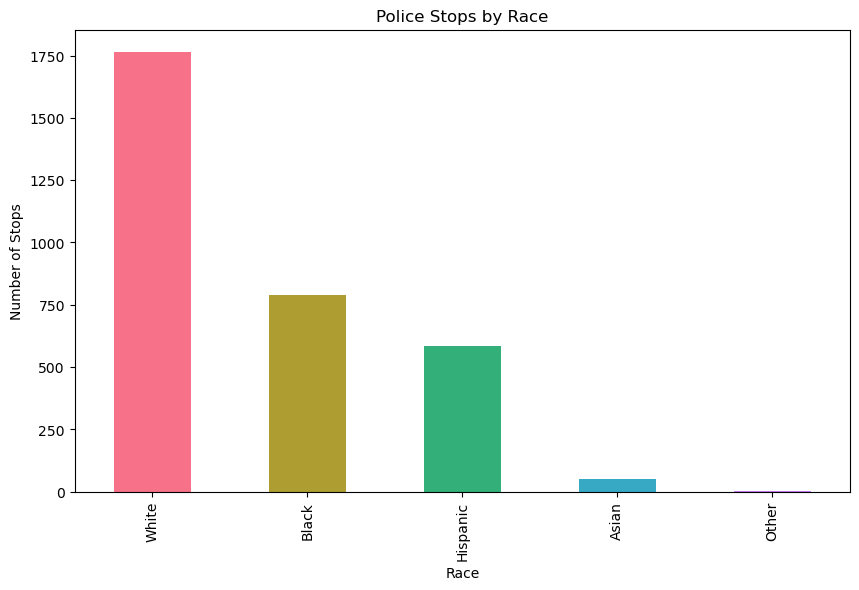

In [8]:
# Creating a custom color palette based on unique values in the 'race' column
race_colors = sns.color_palette('husl', n_colors=len(df['driver_race'].unique()))

# Plotting the bar chart using custom colors previously created
plt.figure(figsize=(10, 6))
df['driver_race'].value_counts().plot(kind='bar', color=race_colors)
plt.title('Police Stops by Race')
plt.xlabel('Race')
plt.ylabel('Number of Stops')
plt.show()

#### Checking how many different gender values our DataFrame contains

In [9]:
df.driver_gender.value_counts()

Male      2722
Female     471
Name: driver_gender, dtype: int64

#### Bar chart based on driver_gender column

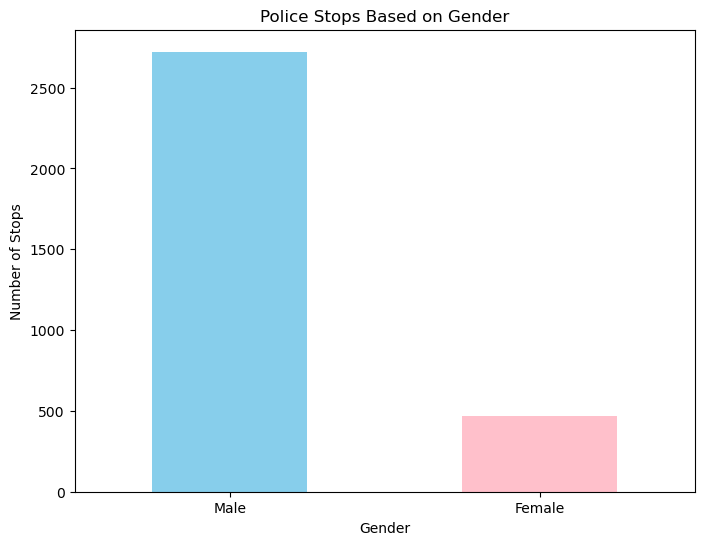

In [10]:
plt.figure(figsize=(8, 6))
df['driver_gender'].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Police Stops Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Stops')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

#### Daily police stops over time based on stop_time column

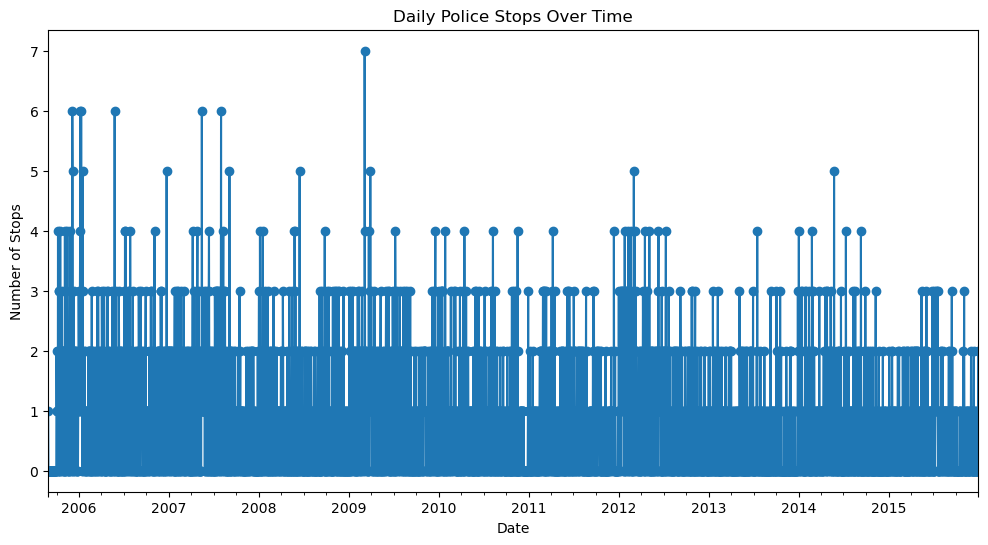

In [11]:


df['stop_date'] = pd.to_datetime(df['stop_date'])
df.set_index('stop_date', inplace=True)

plt.figure(figsize=(12, 6))
df.resample('D').size().plot(legend=False, marker='o')
plt.title('Daily Police Stops Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stops')
plt.show()





#### Histogram based on driver_age column

#### Finding min and max driver_age values

In [12]:
min_age = df['driver_age'].min()

In [13]:
min_age

15

In [14]:
max_age = df['driver_age'].max()

In [15]:
max_age

79

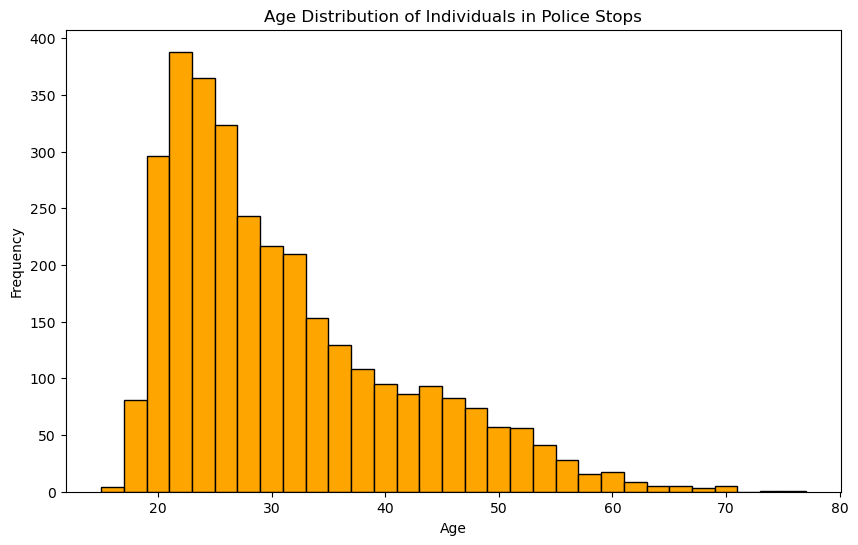

In [16]:
plt.figure(figsize=(10, 6))
df['driver_age'].plot(kind='hist', bins=range(15, 79, 2), color='orange', edgecolor='black')
plt.title('Age Distribution of Individuals in Police Stops')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Pie chart based on stop_outcome column

#### Counting how many different stop outcomes DataFrame contains

In [17]:
df.stop_outcome.value_counts()

Citation            1907
Arrest Driver        951
Arrest Passenger     142
Warning              113
No Action             62
N/D                   18
Name: stop_outcome, dtype: int64

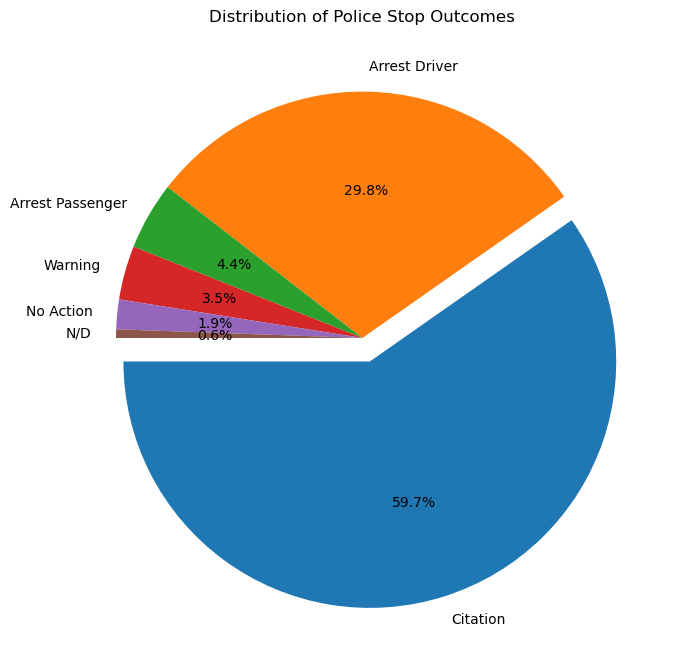

In [18]:
plt.figure(figsize=(8, 8))
df['stop_outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180, explode=(0.1, 0, 0, 0, 0, 0))
plt.title('Distribution of Police Stop Outcomes')
plt.ylabel('')
plt.show()